In [120]:
# Modules
from scipy import ndimage
import numpy as np

import math
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from keras import optimizers

from matplotlib.pyplot import imshow

from PIL import Image, ImageFilter, ImageOps, ImageChops, ImageEnhance, ImageStat, ImageDraw
from __future__ import print_function
import glob
# from tf_unet import unet, util, image_util


from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

import sys
import datetime
import random
import warnings


# Functions
sys.path.insert(0, './helpers/')
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Ploting


In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

def prepare_standardplot(title, xlabel):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.set_ylabel('categorical cross entropy')
    ax1.set_xlabel(xlabel)
    ax1.set_yscale('log')
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel(xlabel)
    return fig, ax1, ax2

def finalize_standardplot(fig, ax1, ax2):
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)

def plot_history(history, title):
    fig, ax1, ax2 = prepare_standardplot(title, 'epoch')
    ax1.plot(history.history['loss'], label = "training")
    ax1.plot(history.history['val_loss'], label = "validation")
    ax2.plot(history.history['acc'], label = "training")
    ax2.plot(history.history['val_acc'], label = "validation")
    finalize_standardplot(fig, ax1, ax2)
    return fig


### loading the data

In [115]:
# Loads all data images in a list
filelist = glob.glob("../randomized_data/train/data_*.tiff")

# Sort the list according the their names 
# so that the the image and labels are on 
# the same position

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    def atoi(text):
        return int(text) if text.isdigit() else text
    
    return [ atoi(c) for c in re.split('(\d+)', text) ]

filelist.sort(key=natural_keys)

data =   [Image.open(fname) for fname in filelist if fname[-9:-5] != 'mask']

labels = [Image.open(fname) for fname in filelist if fname[-9:-5] == 'mask']

In [ ]:
from matplotlib.pyplot import imshow

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(data[0,...,0], cmap="gray", aspect="auto")
ax[1].imshow(label[0,...,1], cmap="gray", aspect="auto")

ax[0].set_title("Input")
ax[1].set_title("Ground truth")
fig.tight_layout()

IndexError: tuple index out of range

In [175]:
print(np.array(labels[1]))

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


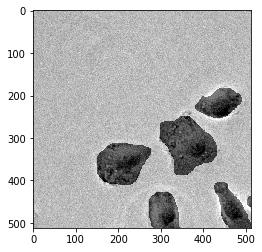

In [181]:
imshow(np.asarray(data[1]),cmap = 'gray', vmin=0, vmax=255)

imshow(np.asarray(labels[1]),cmap = 'gray', vmin=0, vmax=1, alpha = 0.5)

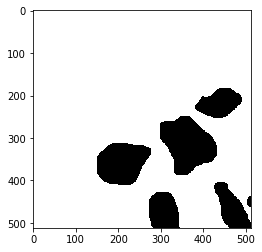

In [170]:


masked_data = np.ma.masked_where(labels[1] == 0, labels[1])

imshow(np.asarray(labels[1]),cmap = 'gray', vmin=0, vmax=1, alpha = 1)


# imshow(np.asarray(labels[1]), vmin=0, vmax=255, alpha = 0.3)